In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [15]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [16]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst experience of my life...
1,✅ Trip Verified | Due to code sharing with Ca...
2,✅ Trip Verified | LHR check in was quick at t...
3,✅ Trip Verified | I wouldn't recommend Britis...
4,✅ Trip Verified | Absolutely horrible experie...


In [17]:
df

,reviews
0,✅ Trip Verified | Worst experience of my life...
1,✅ Trip Verified | Due to code sharing with Ca...
2,✅ Trip Verified | LHR check in was quick at t...
3,✅ Trip Verified | I wouldn't recommend Britis...
4,✅ Trip Verified | Absolutely horrible experie...
...,...
995,✅ Trip Verified | I have flown British Airways...
996,✅ Trip Verified | We can not fault the new 'Cl...
997,✅ Trip Verified | Very disappointing experien...
998,✅ Trip Verified | Calgary to London. Cabin fu...


In [18]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [19]:
df

,reviews
0,Worst experience of my life trying to deal w...
1,Due to code sharing with Cathay Pacific I wa...
2,LHR check in was quick at the First Wing and...
3,I wouldn't recommend British Airways at all....
4,Absolutely horrible experience. I booked a t...
...,...
995,I have flown British Airways numerous times o...
996,We can not fault the new 'Club World' food an...
997,Very disappointing experience - flew out on ...
998,Calgary to London. Cabin full. Overhead lock...


In [20]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...


In [21]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n..."
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),..."
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (..."
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ..."


In [23]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...


In [24]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Worst experience of my life trying to deal w...,Worst experience life try deal customer serv...
1,Due to code sharing with Cathay Pacific I wa...,Due code share Cathay Pacific downgrade BA r...
2,LHR check in was quick at the First Wing and...,LHR check quick First Wing quickly security ...
3,I wouldn't recommend British Airways at all....,recommend British Airways try call customer ...
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience book ticket E...
...,...,...
995,I have flown British Airways numerous times o...,fly British Airways numerous time many year ...
996,We can not fault the new 'Club World' food an...,fault new Club World food service outbound i...
997,Very disappointing experience - flew out on ...,disappointing experience fly series scrap De...
998,Calgary to London. Cabin full. Overhead lock...,Calgary London Cabin full Overhead locker fu...


In [25]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative
1,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...,-0.5369,Negative
2,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...,0.9454,Positive
3,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...,0.2023,Neutral
4,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...,-0.9500,Negative


In [27]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    371
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1b2c3b0a250>,
 [Text(-0.08285944828829273, 1.096874793141569, 'Positive'),
  Text(-0.27690480400560347, -1.0645767842286524, 'Negative'),
  Text(1.2772151775079268, -0.43728868078581135, 'Neutral')],
 [Text(-0.04519606270270512, 0.598295341713583, '52.4%'),
  Text(-0.1510389840030564, -0.5806782459429012, '37.1%'),
  Text(0.8041725191716577, -0.2753299101243997, '10.5%')])

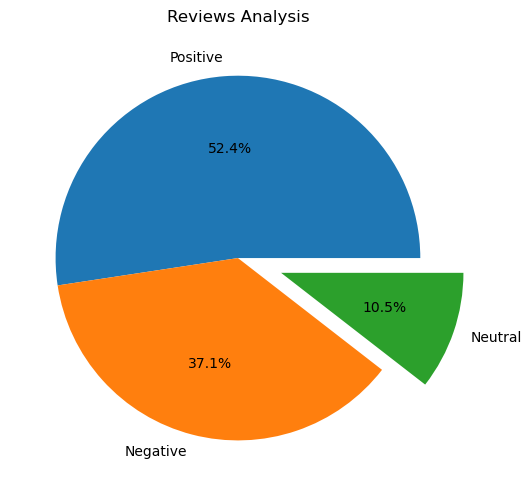

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [34]:
pip install WordCloud

     ------------------------------------ 153.1/153.1 kB 610.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df[Lemma])

NameError: name 'Lemma' is not defined